Iter 0: Cost = 149696476190.4762
Iter 200: Cost = 332360017.2859
Iter 400: Cost = 286156339.0891
Iter 600: Cost = 286142046.6343
Iter 800: Cost = 286142042.2132
Iter 1000: Cost = 286142042.2118
Iter 1200: Cost = 286142042.2118
Iter 1400: Cost = 286142042.2118
Iter 1600: Cost = 286142042.2118
Iter 1800: Cost = 286142042.2118
Iter 2000: Cost = 286142042.2118
Iter 2200: Cost = 286142042.2118
Iter 2400: Cost = 286142042.2118
Iter 2600: Cost = 286142042.2118
Iter 2800: Cost = 286142042.2118

Final Slope (m): 104668.37122604126
Final Intercept (b): 372095.23809523665

Predicted Price for 2500 sq ft: $429560.55


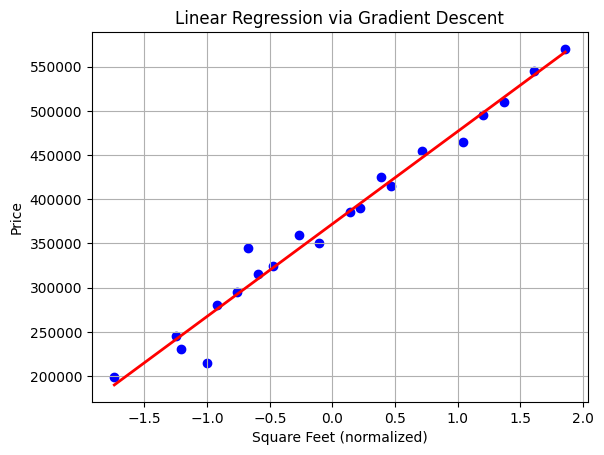

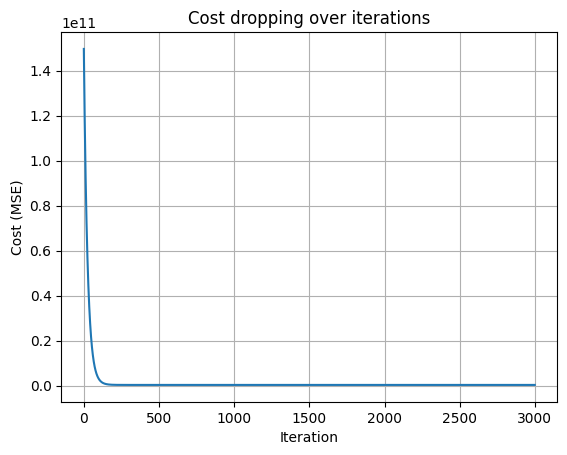

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def load_data(csv_filename):
    X = []
    Y = []
    with open(csv_filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            try:
                sqft = float(row[0])
                price = float(row[1])
                X.append(sqft)
                Y.append(price)
            except:
                continue

    return np.array(X), np.array(Y)

def normalize(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return (arr - mean) / std, mean, std

def gradient_descent(X, Y, lr=0.01, iterations=2000):
    m = 0   # slope
    b = 0   # intercept
    n = len(X)

    cost_history = []

    for i in range(iterations):
        y_pred = m * X + b

        cost = (1/n) * np.sum((y_pred - Y)**2)
        cost_history.append(cost)

        dm = (2/n) * np.sum((y_pred - Y) * X)
        db = (2/n) * np.sum((y_pred - Y))

        m -= lr * dm
        b -= lr * db

        if i % 200 == 0:
            print(f"Iter {i}: Cost = {cost:.4f}")

    return m, b, cost_history

def predict_price(sqft, m, b, x_mean, x_std):
    sqft_norm = (sqft - x_mean) / x_std
    return m * sqft_norm + b

def plot_regression(X_norm, Y, m, b):
    plt.scatter(X_norm, Y, color='blue')

    x_vals = np.linspace(min(X_norm), max(X_norm), 100)
    y_vals = m * x_vals + b

    plt.plot(x_vals, y_vals, color='red', linewidth=2)
    plt.xlabel("Square Feet (normalized)")
    plt.ylabel("Price")
    plt.title("Linear Regression via Gradient Descent")
    plt.grid()
    plt.show()



def main():

    X, Y = load_data("housing_prices - housing_prices.csv")

    X_norm, x_mean, x_std = normalize(X)

    m, b, costs = gradient_descent(X_norm, Y, lr=0.01, iterations=3000)

    print("\nFinal Slope (m):", m)
    print("Final Intercept (b):", b)

    predicted = predict_price(2500, m, b, x_mean, x_std)
    print(f"\nPredicted Price for 2500 sq ft: ${predicted:.2f}")

    plot_regression(X_norm, Y, m, b)

    plt.plot(costs)
    plt.title("Cost dropping over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost (MSE)")
    plt.grid()
    plt.show()


if __name__ == "__main__":
    main()
